In [3]:
import pandas as pd
import matplotlib as mpl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [8]:
df = pd.read_excel(r'C:\Users\tyagir01\Desktop\eateries.xlsx')
df

,Restaurant,Student,Sales
0,McD,2,58
1,Fine Dine,6,105
2,Burger King,8,88
3,Papa Salz,8,118
4,Chillz,12,117
5,Rico's,16,137
6,Gustau,20,157
7,Vitaly Pizzeria,20,169
8,ChinaTown,22,149
9,East Indian Café,26,202


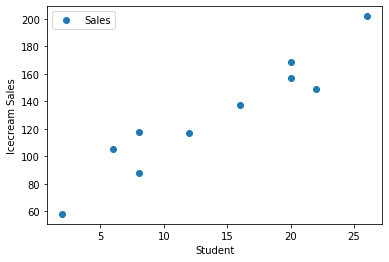

In [9]:
df.plot('Student', 'Sales', style = 'o')
plt.ylabel('Icecream Sales')
plt.show()

In [13]:
import statsmodels.api as sm
St_pop = df['Student']
Revenue = df['Sales']
St_pop = sm.add_constant(St_pop)
model = sm.OLS(Revenue, St_pop)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     74.25
Date:                Sun, 10 May 2020   Prob (F-statistic):           2.55e-05
Time:                        14:58:15   Log-Likelihood:                -39.342
No. Observations:                  10   AIC:                             82.68
Df Residuals:                       8   BIC:                             83.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         60.0000      9.226      6.503      0.0

C:\Users\tyagir01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  "anyway, n=%i" % int(n))


In [14]:
# another method for getting values of regression eqn coefficients

In [15]:
from sklearn.linear_model import LinearRegression

In [39]:
x = df['Student'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [40]:
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [43]:
reg.coef_[0][0] , reg.intercept_[0]

(5.0, 60.0)

In [45]:
#to predict the esitmate of mean quaterly sales for all restaurants located near college campus with 10000 population

In [80]:
k = np.array([10])
k.reshape(1,-1)

array([[10]])

In [81]:
#reg.predict(k)

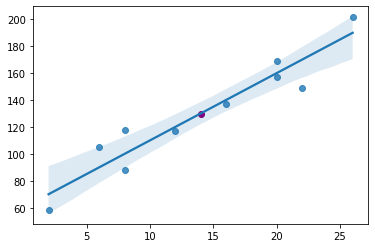

In [85]:
plt.figure()
sb.regplot(x,y,fit_reg = True)
plt.scatter(np.mean(x),np.mean(y), color = 'purple')

In [86]:
# to get the prediction interval

In [90]:
from statsmodels.stats.outliers_influence import summary_table
st,ds,ss = summary_table(result,alpha=0.05)
fittedvalues = ds[:,2]
predict_mean_se = ds[:,3]
predict_mean_ci_low, predict_mean_ci_upp = ds[:,4:6].T
predict_ci_low, predict_ci_upp = ds[:,6:8].T

In [91]:
predict_mean_ci_low

array([ 51.03868339,  75.2931351 ,  87.10977127,  87.10977127,
       109.56629808, 129.56629808, 147.10977127, 147.10977127,
       155.2931351 , 171.03868339])

In [92]:
 predict_mean_ci_upp

array([ 88.96131661, 104.7068649 , 112.89022873, 112.89022873,
       130.43370192, 150.43370192, 172.89022873, 172.89022873,
       184.7068649 , 208.96131661])

In [93]:
predict_ci_low

array([ 32.89834155,  54.8817226 ,  65.60291394,  65.60291394,
        86.446108  , 106.446108  , 125.60291394, 125.60291394,
       134.8817226 , 152.89834155])

In [94]:
predict_ci_upp

array([107.10165845, 125.1182774 , 134.39708606, 134.39708606,
       153.553892  , 173.553892  , 194.39708606, 194.39708606,
       205.1182774 , 227.10165845])

In [95]:
#for plotting the C.I. & P.I. for the data  obtained above on graph 

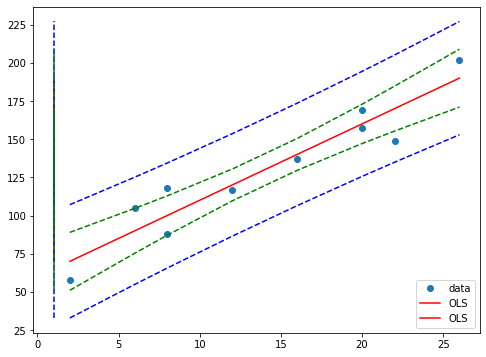

In [102]:
X = sm.add_constant(x)
fig, ax = plt.subplots(figsize=(8,6))
ax.plot(x,y, 'o', label = "data")
ax.plot(X, fittedvalues, 'r-', label = 'OLS')
ax.plot(X,predict_ci_low, 'b--')
ax.plot(X,predict_ci_upp, 'b--')
ax.plot(X,predict_mean_ci_low, 'g--')
ax.plot(X,predict_mean_ci_upp, 'g--')
ax.legend(loc='best')
plt.show()

In [103]:
# Residual plot against X

Text(0, 0.5, 'Residual')

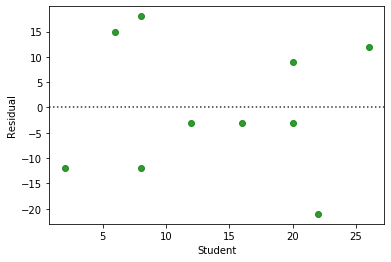

In [109]:
sb.residplot(df['Student'],df['Sales'], color = "g")
plt.ylabel('Residual')

Text(0, 0.5, 'Residual')

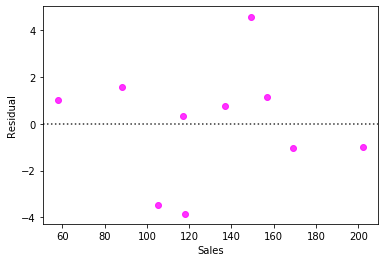

In [111]:
sb.residplot(df['Sales'], df['Student'], color = "magenta")
plt.ylabel('Residual')

In [ ]:
# NEW QUESTION !

In [126]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

In [123]:
db = pd.read_excel(r'C:\Users\tyagir01\Desktop\Icecream.xlsx')
db

,Student_Population,Sales
0,2,58
1,6,105
2,8,88
3,8,118
4,12,117
5,16,137
6,20,157
7,20,169
8,22,149


In [124]:
reg1 = ols(formula = "Sales ~ Student_Population", data = db).fit()
print(reg1.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.869
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     46.39
Date:                Sun, 10 May 2020   Prob (F-statistic):           0.000251
Time:                        20:12:20   Log-Likelihood:                -35.174
No. Observations:                   9   AIC:                             74.35
Df Residuals:                       7   BIC:                             74.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             63.6340      9

C:\Users\tyagir01\Anaconda3\lib\site-packages\scipy\stats\stats.py:1535: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=9
  "anyway, n=%i" % int(n))


In [125]:
print(anova_lm(reg1))

                     df       sum_sq      mean_sq          F    PR(>F)
Student_Population  1.0  8662.745098  8662.745098  46.386681  0.000251
Residual            7.0  1307.254902   186.750700        NaN       NaN


In [127]:
# to plot standardized residuals against the independent variable x

In [128]:
i= reg1.get_influence()
resid_student = i.resid_studentized_external
resid_student

array([-1.51435171,  1.16545007, -1.00050788,  1.52940116, -0.13885621,
       -0.02623764,  0.09421623,  1.13322003, -1.56620241])

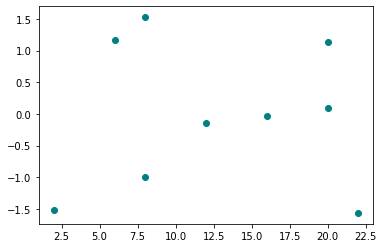

In [133]:
plt.figure()
plt.scatter(db['Student_Population'], resid_student, color = "teal")

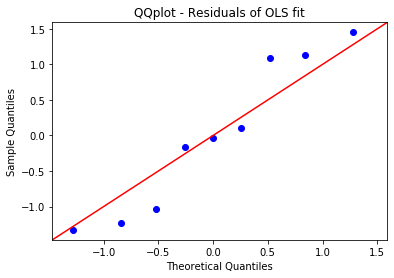

In [135]:
rez = reg1.resid
probplot = sm.ProbPlot(rez, stats.norm, fit = True)
fg = probplot.qqplot(line = '45')
h = plt.title('QQplot - Residuals of OLS fit')
plt.show()